## LDA model of negative tweets

In [1]:
import pandas as pd


# NLP 

from wordcloud import WordCloud

In [2]:
#Import Data
tweets = pd.read_csv("/Volumes/GoogleDrive/Shared drives/Unidad Compartida Pachitos/Data Science Projects Pachitos/HackOff-CompanySentiments/archive (2)/Tweets.csv")
tweets.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold','retweet_count',
'tweet_coord','tweet_created','tweet_location','user_timezone','airline'], axis = 1, inplace = True)
tweets = tweets.rename(columns = {'airline_sentiment':'flag'})

In [3]:
# Only take negative tweets
neg = tweets[tweets.flag == 'negative']
neg

,flag,text
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
15,negative,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,@VirginAmerica I flew from NYC to SFO last we...
...,...,...
14631,negative,@AmericanAir thx for nothing on getting us out...
14633,negative,@AmericanAir my flight was Cancelled Flightled...
14634,negative,@AmericanAir right on cue with the delays👌
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


In [4]:
from wordcloud import STOPWORDS , WordCloud
stopwords = set(STOPWORDS)
stopwords.update(["american", "air","airline","thank","united","us","airways","virgin","america","jetblue",
        "usairway","usairways","flight","americanair","southwestair","southwestairlines",
        "southwestairway","southwestairways","virginamerica","really","will","going","thanks","thankyou",
        "please","got","let","take","help","already","never","now","told","guy","new","sure","still","amp",
        "plane","tell","ye","trying","yes"])

depression_words = ' '.join(list(tweets[tweets['flag'] == 'negative']['text']))
dep_wc = WordCloud(stopwords = stopwords,width = 512,height = 512, collocations=False, colormap="coolwarm").generate(depression_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(dep_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#!pip install wordcloud

# Preprocessing
import nltk # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer, SnowballStemmer    # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
#nltk.download('stopwords')
#nltk.download('wordnet')
#classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn import feature_extraction
from collections import Counter
from nltk.util import ngrams
#nltk.download('punkt')

In [ ]:
class TweetClassify():

    def __init__(self, tweets_df, column_name , stemm = False, lemm =True):
        self.tweets_ = tweets_df
        self.stemm_ = stemm
        self.lemm_ = lemm
        self.lemmatizer_ = WordNetLemmatizer()
        self.vect_wc = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,2))
        self.vect_tfidf = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
        self.stopwords_eng_ = nltk.corpus.stopwords.words('english')
        self.preprocess(column_name)
    def preprocess(self, column_name):
        self.tweets_['tweets_clean'] = self.tweets_[column_name].apply(lambda x: self.clean_text(x, stemm= self.stemm_, lemm = self.lemm_ ,stop_words = self.stopwords_eng_))


    def clean_text(self,observation,stemm , lemm , stop_words):
        #Clean tweets (removing punctuations and converting everything to lowercase)
        
        observation = re.sub(r'[^\$\w\s]', '', str(observation).lower().strip())
        observation = re.sub(r'^RT[\s]+', '', observation)
        observation = re.sub(r'https?:\/\/.*[\r\n]*', '', observation) # removing hyperlinks
        observation = re.sub(r'#', '', observation) #removing hash # sign


        #Tokenize (converting strings to lists)
        tokens_list = observation.split()
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        tokens_list = tokenizer.tokenize(observation)
        #Remove the Stopwords
        stop_words = set(stop_words)
        stop_words.update(["american", "air","airline","thank","united","us","airways","virgin","america","jetblue","youre","extremely",
                     "usairway","usairways","flight","americanair","southwestair","southwestairlines","arbitrarily","dream","crazy",
                     "southwestairway","southwestairways","virginamerica","really","will","going","thanks","thankyou","passengersdont",
                     "please","got","let","take","help","already","never","now","told","guy","new","sure","still","amp","continue",
                     "plane","tell","ye","trying","yes","guy","much","appreciate", "thx","back","ok","good","credit","aacom",
                     "flying","love","great","awesome","see","nice","alway","httptcojwl26g6lrw","dontflythem","motherinlaw","night",
                     "nogearnotraining","seriously","didnt","coudnt","cant","wont","dont","wat","buffaloniagara","hasshe","morning",
                     "woulda","people","try","youve","youd","yours","flightled","tomorrow","today","wat","jfkyou","flite","cause",
                     "flightr","flight","need","hours","nooooo","like","doesnt","right","talk","tweet","mention","pbijfk","ridiculuous",
                     "wasnt","suppose","want","understand","come","work","worse","treat","think","know","worst","paulo","staduim",
                     "wouldnt","stay","away","wont","werent","happen","sorry","havent","tonight","drive","life","thing","aa951",
                     "whats","theyre","better","thats","allow","hope","stop","cool","niece","happy","word","customercant",
                     "suck","sunday","monday","tuesday","wednesday","thursday","friday","saturday","weekend","ruin","shouldnt",
                     "miami","los angeles","new york","chicago","dallas","apparently","itover","someones","savannah","lucymay",
                     "betterother","instead","look","hopefully","yesterday","antonio","unacceptable","folks","record",'arent',
                     "miss","hang","wrong","stick","grind","tarmac","theres","forget","terrible","clothe","terrible","break",
                     "actually","frustrate","correct","ridiculous","expect","different","pathetic","bother","follow","fault",
                     "impossible","point","cover","person","ask","speak","things","earlier","mean","select","minutes",
                     "unite","horrible","country","leave","speak","apologize","faster","hop","confuse","lose","flightd","hear",
                     "literally","years","surprise","bump","fail","compensate","hand","helpful","upset","friend","excuse","claim",
                     "situation","multiple","weather","choose","company","believe","question","kick","anymore","awful","delta",
                      "dozen","medical","completely","finally", "waste","shock","annoy","maybe","strand","mess","finally",
                      "plan","place","apology","center","plan","twitter","promise","prefer","count","maybe","shock","longer","meet",
                         "important","drop"])
        if stop_words is not None:
            stop_text = []
            for word in tokens_list: 
                if (word not in stop_words and  # remove stopwords
        word not in string.punctuation ): # remove punctuation
                    word_ = ''
                    for char in word:
                        if (char not in string.punctuation and
                            char not in ['1','2','3','4','5','6','7','8','9','0','',' ']):
                            word_ = "".join((word_,char))
                    stop_text.append(word_)
                    tokens_list = stop_text.copy()

        if lemm == True:
            lem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Wordnet Lemmatizer
                lem_word = self.lemmatizer_.lemmatize(word,'v')
                lem_text.append(lem_word)
            tokens_list = lem_text.copy()
        
        tweets_clean = " ".join(tokens_list)

        return tokens_list

In [ ]:
from nltk.tokenize import TweetTokenizer
tweets_processed = TweetClassify(neg, column_name='text')

In [ ]:
neg

## Corpus

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from bs4 import BeautifulSoup
from gensim.models import CoherenceModel
from gensim import corpora, models

In [10]:
processed_docs=neg['tweets_clean'] 
id2word = gensim.corpora.Dictionary(processed_docs) # Create Dictionary
corpus = [id2word.doc2bow(text) for text in processed_docs] #Create Corpus: TDF

In [11]:
id2word.save_as_text('dict_.txt')
id2word.save('id2word.dict')

## K topics

In [12]:
def coherence(dictionary, corpus, texts, start, stop):
    values = []
    models = []
    for num_topics in range(start, stop):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=num_topics,
                                                id2word=id2word,
                                               random_state=123,
                                               alpha='auto',
                                                eta='auto',
                                               per_word_topics=True)
        models.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        values.append(coherencemodel.get_coherence())

    return models, values

In [15]:
start=3
stop=9
models, values = coherence(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=processed_docs,
                                                        start=start, 
                                                        stop=stop)

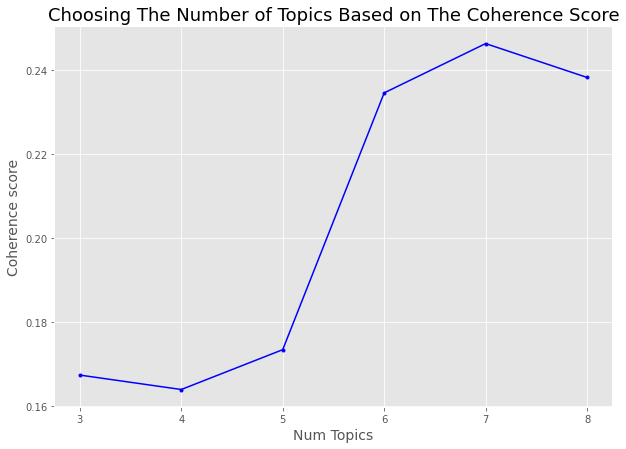

In [16]:
x = range(start, stop)
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(x, values, color = "blue",marker=".")
plt.xlabel("Num Topics", size=14)
plt.ylabel("Coherence score", size=14)
plt.title('Choosing The Number of Topics Based on The Coherence Score',size=18)
plt.show()

## LDA model

In [17]:
k_topics = 4Phone and Online Booking
rs = 42

In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k_topics, 
                                           random_state=rs,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           iterations=125,
                                           per_word_topics=True)
doc_lda = lda_model[corpus]

In [19]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.037*"flight" + 0.036*"hold" + 0.032*"phone" + 0.024*"im" + 0.024*"one" + '
  '0.023*"bag" + 0.020*"hour" + 0.017*"ive" + 0.015*"book" + 0.013*"change"'),
 (1,
  '0.137*"call" + 0.034*"agent" + 0.029*"airport" + 0.025*"luggage" + '
  '0.025*"line" + 0.020*"crew" + 0.019*"email" + 0.018*"response" + '
  '0.016*"try" + 0.014*"baggage"'),
 (2,
  '0.097*"cancel" + 0.047*"service" + 0.034*"customer" + 0.034*"delay" + '
  '0.033*"late" + 0.027*"make" + 0.019*"go" + 0.015*"ever" + 0.015*"customers" '
  '+ 0.014*"system"'),
 (3,
  '0.136*"" + 0.052*"get" + 0.025*"wait" + 0.021*"aa" + 0.018*"time" + '
  '0.013*"hrs" + 0.012*"ticket" + 0.011*"gate" + 0.011*"seat" + 0.010*"would"')]


In [20]:
from string import punctuation
class ProcessTweet():

    def __init__(self,  stemm = False, lemm =True):
        #self.tweet_ = tweet
        self.stemm_ = stemm
        self.lemm_ = lemm
        self.stemmer_ = nltk.stem.SnowballStemmer('english')
        self.lemmatizer_ = nltk.stem.WordNetLemmatizer()
        self.vect_wc = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,2))
        self.vect_tfidf = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
        self.stopwords_eng_ = nltk.corpus.stopwords.words('english')

    def preprocess(self, tweet):
        clean_tweet = self.clean_text(tweet, stemm= self.stemm_, lemm = self.lemm_ ,stop_words = self.stopwords_eng_)
        
        return clean_tweet

    def clean_text(self, observation, stemm, lemm, stop_words):
        #Clean tweets (removing punctuations and converting everything to lowercase)
        observation = re.sub(r'[^\$\w\s]', '', str(observation).lower().strip())
        observation = re.sub(r'^RT[\s]+', '', observation)
        observation = re.sub(r'https?:\/\/.*[\r\n]*', '', observation) # removing hyperlinks
        observation = re.sub(r'#', '', observation) #removing hash # sign

        #Tokenize (converting strings to lists)
        tokens_list = observation.split()
        tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        tokens_list = tokenizer.tokenize(observation)
        #Remove the Stopwords
        stop_words = set(stop_words)
        stop_words.update(["american", "air","airline","thank","united","us","airways","virgin","america","jetblue","youre","extremely",
                     "usairway","usairways","flight","americanair","southwestair","southwestairlines","arbitrarily","dream","crazy",
                     "southwestairway","southwestairways","virginamerica","really","will","going","thanks","thankyou","passengersdont",
                     "please","got","let","take","help","already","never","now","told","guy","new","sure","still","amp","continue",
                     "plane","tell","ye","trying","yes","guy","much","appreciate", "thx","back","ok","good","credit","aacom",
                     "flying","love","great","awesome","see","nice","alway","httptcojwl26g6lrw","dontflythem","motherinlaw","night",
                     "nogearnotraining","seriously","didnt","coudnt","cant","wont","dont","wat","buffaloniagara","hasshe","morning",
                     "woulda","people","try","youve","youd","yours","flightled","tomorrow","today","wat","jfkyou","flite","cause",
                     "flightr","flight","need","hours","nooooo","like","doesnt","right","talk","tweet","mention","pbijfk","ridiculuous",
                     "wasnt","suppose","want","understand","come","work","worse","treat","think","know","worst","paulo","staduim",
                     "wouldnt","stay","away","wont","werent","happen","sorry","havent","tonight","drive","life","thing","aa951",
                     "whats","theyre","better","thats","allow","hope","stop","cool","niece","happy","word","customercant",
                     "suck","sunday","monday","tuesday","wednesday","thursday","friday","saturday","weekend","ruin","shouldnt",
                     "miami","los angeles","new york","chicago","dallas","apparently","itover","someones","savannah","lucymay",
                     "betterother","instead","look","hopefully","yesterday","antonio","unacceptable","folks","record",'arent',
                     "miss","hang","wrong","stick","grind","tarmac","theres","forget","terrible","clothe","terrible","break",
                     "actually","frustrate","correct","ridiculous","expect","different","pathetic","bother","follow","fault",
                     "impossible","point","cover","person","ask","speak","things","earlier","mean","select","minutes",
                     "unite","horrible","country","leave","speak","apologize","faster","hop","confuse","lose","flightd","hear",
                     "literally","years","surprise","bump","fail","compensate","hand","helpful","upset","friend","excuse","claim",
                     "situation","multiple","weather","choose","company","believe","question","kick","anymore","awful","delta",
                      "dozen","medical","completely","finally", "waste","shock","annoy","maybe","strand","mess","finally",
                      "plan","place","apology","center","plan","twitter","promise","prefer","count","maybe","shock","longer","meet",
                         "important","drop"])
        if stop_words is not None:
            stop_text = []
            for word in tokens_list: 
                if (word not in stop_words and  # remove stopwords
        word not in punctuation ): # remove punctuation
                    word_ = ''
                    for char in word:
                        if (char not in punctuation and
                            char not in ['1','2','3','4','5','6','7','8','9','0','',' ']):
                            word_ = "".join((word_,char))
                    stop_text.append(word_)
                    tokens_list = stop_text.copy()
        if stemm == True:
            stem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Stemmer
                stem_word = self.stemmer_.stem(word)
                stem_text.append(stem_word)
            tokens_list = stem_text.copy()
        if lemm == True:
            lem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Wordnet Lemmatizer
                lem_word = self.lemmatizer_.lemmatize(word)
                lem_text.append(lem_word)
            tokens_list = lem_text.copy()
        return tokens_list

In [21]:
id2word = corpora.Dictionary.load('id2word.dict')

message = '''United is the worst all the people are mad!!!
                    '''
clean_class = ProcessTweet()
clean_tweet = clean_class.preprocess(message)
clean_tweet

['mad']

In [22]:
bow_vector = id2word.doc2bow(clean_tweet)
result = lda_model.get_document_topics(bow_vector)
resultdict = dict(result)

In [23]:
resultdict

{0: 0.2636501, 1: 0.12838125, 2: 0.18912145, 3: 0.4188472}

In [26]:
orddict = sorted(resultdict, key=resultdict.get, reverse=True)
Keymax = 1
if resultdict[orddict[0]]-resultdict[orddict[1]] <=.08:
    Keymax +=orddict[1]
    print("Predicted topic: ",orddict[1]+1)
    print("Probability Score: ",resultdict[orddict[1]])
else:
    Keymax +=orddict[0]
    print("Predicted topic: ",orddict[0]+1)
    print("Probability Score: ",resultdict[orddict[0]])

#Keymax = max(resultdict, key=resultdict.get)+1
#print("Predicted Topic :", Keymax) 


if Keymax == 1:
    print('Phone and Online Booking')
elif Keymax == 2:
    print('Baggage Problem')
elif Keymax == 3:
    print('Delay and Customer Service')
elif Keymax == 4:
    print('Cancelled Flight and Services')
else:
    print('Customer Experience')
print("\n")

for index, score in resultdict.items():
    print("Score: {}\n Topic: {}\n Keywords:{} \n".format(score, index+1, lda_model.print_topic(index)))

Predicted topic:  4
Probability Score:  0.4188472
Cancelled Flight and Services


Score: 0.2636500895023346
 Topic: 1
 Keywords:0.037*"flight" + 0.036*"hold" + 0.032*"phone" + 0.024*"im" + 0.024*"one" + 0.023*"bag" + 0.020*"hour" + 0.017*"ive" + 0.015*"book" + 0.013*"change" 

Score: 0.12838125228881836
 Topic: 2
 Keywords:0.137*"call" + 0.034*"agent" + 0.029*"airport" + 0.025*"luggage" + 0.025*"line" + 0.020*"crew" + 0.019*"email" + 0.018*"response" + 0.016*"try" + 0.014*"baggage" 

Score: 0.18912145495414734
 Topic: 3
 Keywords:0.097*"cancel" + 0.047*"service" + 0.034*"customer" + 0.034*"delay" + 0.033*"late" + 0.027*"make" + 0.019*"go" + 0.015*"ever" + 0.015*"customers" + 0.014*"system" 

Score: 0.4188472032546997
 Topic: 4
 Keywords:0.136*"" + 0.052*"get" + 0.025*"wait" + 0.021*"aa" + 0.018*"time" + 0.013*"hrs" + 0.012*"ticket" + 0.011*"gate" + 0.011*"seat" + 0.010*"would" 



## Visualize 

In [31]:

import pyLDAvis
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.129179  0.232350       1        1  26.358200
1     -0.091155 -0.135493       2        1  12.831061
2     -0.074299 -0.125229       3        1  18.895809
3      0.294633  0.028372       4        1  41.914930, topic_info=           Term         Freq        Total Category  logprob  loglift
10               4265.000000  4265.000000  Default  30.0000  30.0000
48         call  1319.000000  1319.000000  Default  29.0000  29.0000
161      cancel  1373.000000  1373.000000  Default  28.0000  28.0000
70          get  1628.000000  1628.000000  Default  27.0000  27.0000
151     service   662.000000   662.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
787        rude   174.927428   175.665372   Topic4  -5.1881   0.8653
26         last   166.399350   167.116244   Topic4  -5.2380   0.8652
366        days   156.290701   156.994806   Topic4  -5.3007   0.8650
33    available   162.058543   162.868879   Topic4  -5.2645   0.8645
2129         aa   650.362123   874.721532   Topic4  -3.8749   0.5732

[157 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
10        4  0.999874         
2129      1  0.139473       aa
2129      2  0.018292       aa
2129      3  0.099460       aa
2129      4  0.743094       aa
...     ...       ...      ...
476       1  0.998890      way
189       2  0.994375  website
584       3  0.991131     well
15        4  0.998913    would
219       2  0.994168      yet

[138 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])